In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [31]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [337]:
from PIML.box.boxWR import BoxWR

In [338]:
bb = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [118.36511806290223, 126.43542909949568, 126.19278367193178, 109.7742722291957, 99.00123202697678, 82.00257252430589, 74.44037606583458, 46.286434461921196, 23.827726724918577, 10.009192192906355, 6.376586782204838]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


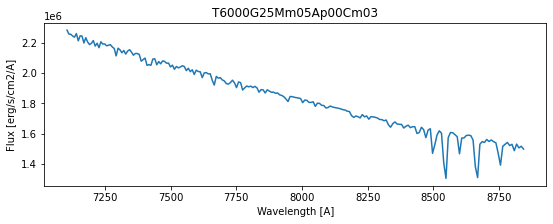

In [339]:
W="RedM"; R="R"; Res=5000;step=10;
bb.init(W,R, Res,step, onPCA=1)

In [166]:
np.random.seed(42)
obH, ovH = bb.Obs.add_obs_to_flux(bb.fluxH0, 100, step=0)

In [174]:
bb.Obs.get_snr(obH) / 1.414

10.000682356945424

In [477]:
bb.estimate_snr(100)

9.471621972684638

In [169]:
np.random.seed(42)
ob, ov = bb.Obs.add_obs_to_flux(bb.flux0, 100, step=bb.step)

In [172]:
bb.Obs.get_snr(ob)

53.17164756918003

In [171]:
(37  / 14 )**2

6.98469387755102

(8500.0, 8750.0)

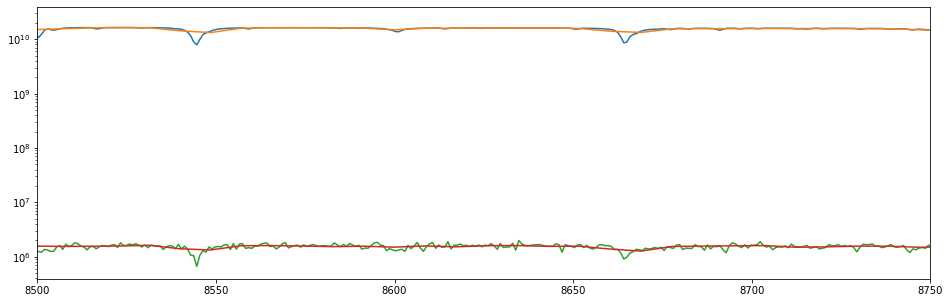

In [179]:
plt.figure(figsize=(16,5))
plt.plot(bb.wave_H,ovH)
plt.plot(bb.wave, ov*10)
# plt.plot(bb.wave, obsvar*10)
plt.plot(bb.wave_H, obH)

plt.plot(bb.wave, ob)
plt.yscale("log")
plt.xlim(8500, 8750)

In [182]:
bb.PhyMid

array([-5.0e-01,  6.0e+03,  2.5e+00, -2.5e-01,  0.0e+00])

In [353]:
name = bb.Obs.get_pmt_name(*bb.PhyMid)

In [468]:
diff_10k_100, bias_10k_100 = bb.eval_pca_bias(bb.PhyMid, 10000, noise_level=100)

noise_level 100


as we go to lower coefficients, we see 10% to 20% error. Higher coeffients which contain information of [M/H] and logg doesn't contribute. Most of the information from Teff, logg are encoded in the first 3 coeffs. We are doing pretty well with the first few coeffients. there's no point to go to further eigvs, When taking log might causing systematic bias. non-bias estimator. It is We generate bias analysis for all boxes to see if the bias depends on the shape of spectra.

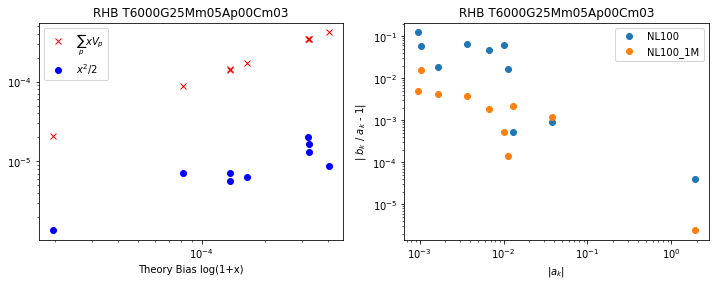

In [476]:
bb.plot_bias_evals(diffs, bias_10k_100, diff_labels=["NL100", "NL100_1M"],)

0.00032180974845671365


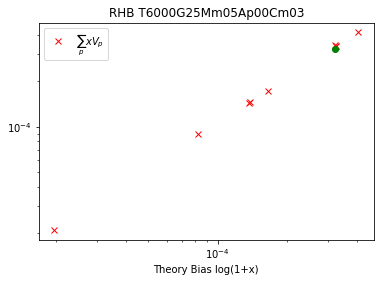

In [472]:
b0 = bb.plot_theory_bias(bias_10k_100, NL=100, log=1)

In [474]:
b0

array([3.21809748e-04, 4.06772262e-04, 8.19613025e-05, 1.95410196e-05,
       1.36460094e-04, 3.26632682e-04, 3.24538099e-04, 1.65232667e-04,
       1.37377478e-04])

In [425]:


b0 = bias_10k_100[0]

In [426]:
b0

array([ 2.20608354e-02, -3.21809748e-04,  4.06772262e-04,  8.19613025e-05,
        1.95410196e-05,  1.36460094e-04,  3.26632682e-04,  3.24538099e-04,
        1.65232667e-04,  1.37377478e-04])

In [466]:
bias_10k_100

(array([ 2.20608354e-02, -3.21809748e-04,  4.06772262e-04,  8.19613025e-05,
         1.95410196e-05,  1.36460094e-04,  3.26632682e-04,  3.24538099e-04,
         1.65232667e-04,  1.37377478e-04]),
 array([ 2.25844671e-02, -3.41263897e-04,  4.15278914e-04,  8.88555704e-05,
         2.08642807e-05,  1.42001688e-04,  3.39392360e-04,  3.40326084e-04,
         1.71398319e-04,  1.44266257e-04]),
 array([ 5.36098624e-04, -2.02113190e-05,  8.66924211e-06,  7.17979021e-06,
         1.37333586e-06,  5.73031186e-06,  1.31911642e-05,  1.63572463e-05,
         6.37029144e-06,  7.14138548e-06]))

0.00032180974845671365


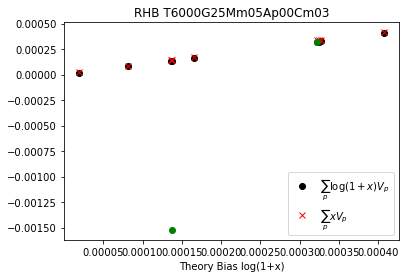

In [467]:
bb.plot_theory_bias(bias_10k_100, NL=100, log=0)

In [453]:
bias_10k_100[0]

array([ 2.20608354e-02, -3.21809748e-04,  4.06772262e-04,  8.19613025e-05,
        1.95410196e-05,  1.36460094e-04,  3.26632682e-04,  3.24538099e-04,
        1.65232667e-04,  1.37377478e-04])

In [396]:
y0 = bias_10k_100[0][0]

In [398]:
y0*10

0.2206083543100359

In [397]:
y0

0.022060835431003588

In [304]:
obsfluxs_1M, obsvar_1M, bias_1M, A_1M = bb.make_obs_from_pmt(bb.PhyMid, noise_level=100, N=1000000, onPCA=1, plot=0)
bk_1M, ak_1M, diff_1M = bb.eval_bias(obsfluxs_1M, bb.PhyMid)

noise_level 100
A = 1836582.8875662684, dA = -0.7313268736470491


In [305]:
obsfluxs, obsvar, bias, A = bb.make_obs_from_pmt(bb.PhyMid, noise_level=100, N=10000, onPCA=1, plot=0)
bk, ak, diff = bb.eval_bias(obsfluxs, bb.PhyMid)

noise_level 100
A = 1836582.8875662684, dA = 39.27528710337356


In [307]:
np.mean(diff / diff_1M)

4.007677800991997

In [308]:
diff_1M

array([ 4.57668443e-06,  2.79981585e-05, -4.41128580e-05,  5.38528627e-06,
       -6.84229671e-06, -1.38549246e-05, -1.57329989e-06,  1.62355397e-05,
       -1.27999169e-05, -4.83412328e-06])

In [318]:
bias[0] 

array([ 5.23631660e-04, -1.94541488e-05,  8.50665260e-06,  6.89426786e-06,
        1.32326115e-06,  5.54159368e-06,  1.27596775e-05,  1.57879852e-05,
        6.16565137e-06,  6.88877930e-06])

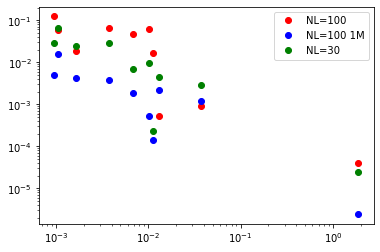

In [332]:
plt.plot(abs(ak), abs(diff)/ abs(ak), 'ro', label="NL=100")
plt.plot(abs(ak), abs(diff_1M)/ abs(ak), 'bo', label="NL=100 1M")
plt.plot(abs(ak), abs(diff1) / abs(ak), 'go', label="NL=30")
plt.legend()

plt.xscale("log")
plt.yscale("log")

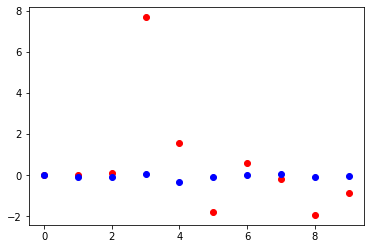

In [315]:
plt.plot(diff / bias[2],'ro')
plt.plot(diff_1M / bias_1M[2],'bo')

In [ ]:
bias[0] =  eigv.dot (np.divide(obsvar**0.5, A * mp))
bias[1] = 0.5 * eigv.dot(np.divide(obsvar, A**2 * flux**2))


In [297]:
diff / diff_1M

array([  230.3384931 ,   288.65182326,    24.27951474,  -217.64700227,
        -978.92077155,   135.68303634, -2212.28119781,  -665.01200717,
          94.09313688, -2325.38936759])

In [309]:
bias_1M[1]/ bias[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [310]:
bias[0]/ bias1[0]

array([3.33333333, 3.33333333, 3.33333333, 3.33333333, 3.33333333,
       3.33333333, 3.33333333, 3.33333333, 3.33333333, 3.33333333])

In [286]:
bias[1]/ bias1[1]

array([11.11111111, 11.11111111, 11.11111111, 11.11111111, 11.11111111,
       11.11111111, 11.11111111, 11.11111111, 11.11111111, 11.11111111])

In [287]:
diff / diff1

array([3.33288715, 3.33268857, 3.33313845, 3.333898  , 3.33320216,
       3.33310635, 3.33418308, 3.33348269, 3.3336545 , 3.33172731])

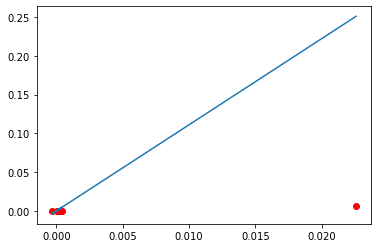

In [284]:
plt.plot(bias[0], bias1[0], 'ro') 
plt.plot(bias[0], 11.11*bias[0]) 

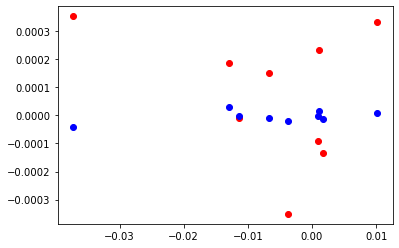

In [275]:
plt.plot(ak[1:], diff[1:],'ro')
plt.plot(ak[1:], diff_1M[1:], 'bo')

In [271]:
ak

array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
        1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
       -6.76999511e-03,  9.55919932e-04])

In [265]:
bias_1M[1]

array([ 5.36098624e-04, -2.02113190e-05,  8.66924211e-06,  7.17979021e-06,
        1.37333586e-06,  5.73031186e-06,  1.31911642e-05,  1.63572463e-05,
        6.37029144e-06,  7.14138548e-06])

In [292]:
obsfluxs, obsvar, bias, A = bb.make_obs_from_pmt(bb.PhyMid, noise_level=100, N=10000, onPCA=1, plot=0)
bk, ak, diff = bb.eval_bias(obsfluxs, bb.PhyMid)

noise_level 100
A = 1836582.8875662684, dA = -1327.9498444781639


In [254]:
bias[1]

array([ 5.36098624e-04, -2.02113190e-05,  8.66924211e-06,  7.17979021e-06,
        1.37333586e-06,  5.73031186e-06,  1.31911642e-05,  1.63572463e-05,
        6.37029144e-06,  7.14138548e-06])

In [ ]:
obsfluxs_1M, obsvar_1M, bias_1M, A_1M = bb.make_obs_from_pmt(bb.PhyMid, noise_level=100, N=1000000, onPCA=1, plot=0)
bk_1M, ak_1M, diff_1M = bb.eval_bias(obsfluxs_1M, bb.PhyMid)

In [261]:
obsfluxs1, obsvar1, bias1, A1 = bb.make_obs_from_pmt(bb.PhyMid, noise_level=30, N=10000, onPCA=1, plot=0)
bk1 ,ak, diff1 = bb.eval_bias(obsfluxs1, bb.PhyMid)

noise_level 30
A = 1836582.8875662684, dA = -3.0578900570981205


In [249]:
bias1[1]

array([ 4.82488762e-05, -1.81901871e-06,  7.80231789e-07,  6.46181119e-07,
        1.23600227e-07,  5.15728067e-07,  1.18720478e-06,  1.47215217e-06,
        5.73326230e-07,  6.42724693e-07])

In [ ]:
0.5 * bb.eigv.dot(np.divide(obsvar, A**2 * mp**2))

In [246]:
obsvar.mean() / obsvar1.mean() = (100 /30)**2

0.0

In [ ]:
bias10k_100 = bias

In [251]:
bias[1] / bias1[1]

array([11.11111111, 11.11111111, 11.11111111, 11.11111111, 11.11111111,
       11.11111111, 11.11111111, 11.11111111, 11.11111111, 11.11111111])

In [263]:
diff / diff1

array([3.33288715, 3.33268857, 3.33313845, 3.333898  , 3.33320216,
       3.33310635, 3.33418308, 3.33348269, 3.3336545 , 3.33172731])

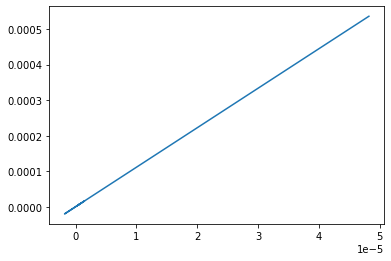

In [250]:
plt.plot(bias1[1], bias[1])

In [ ]:
plt.

In [ ]:
bk = np.log(obsfluxs).dot(bb.eigv.T)
ak

In [ ]:
diff = bk - ak

In [ ]:
       obsflux_in_res = flux_in_res + noise_level * noise
        obsvar_in_res = var_in_res * noise_level**2

In [227]:
100 / 30

3.3333333333333335

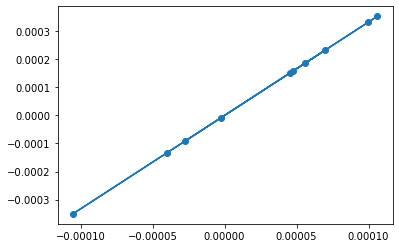

In [228]:
plt.scatter(diff1, diff)
plt.plot(diff1, 3.33* diff1)

(array([ 1.57631952e-04,  1.87169020e-04,  3.53491647e-04,  3.31191227e-04,
        -1.32330594e-04, -3.51188092e-04, -8.60718883e-06,  2.32717947e-04,
         1.52543145e-04, -9.17450606e-05]),
 array([ 4.72959164e-05,  5.61615693e-05,  1.06053695e-04,  9.93405398e-05,
        -3.97007403e-05, -1.05363602e-04, -2.58149856e-06,  6.98122559e-05,
         4.57585345e-05, -2.75367856e-05]))

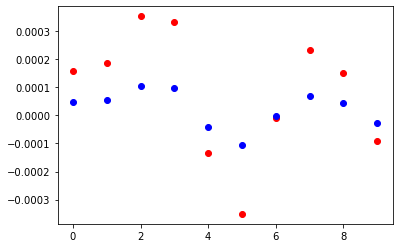

In [222]:
plt.plot(diff, "ro")
plt.plot(diff1, "bo", label = "NL=1")
diff, diff1

In [192]:
obsfluxs1, obsvar, bias1, A1 = bb.make_obs_from_pmt(bb.PhyMid, noise_level=100, N=2, onPCA=1, plot=0)


noise_level 100
A = 1836582.8875662684, dA = -2231.8329823825043


Step

In [201]:
bk

array([-1.89189229e+00, -1.29227292e-02, -3.73128570e-02,  1.01761727e-02,
        1.64024595e-03, -3.73396751e-03, -1.13131779e-02,  1.06755951e-03,
       -6.77873245e-03,  9.52600496e-04])

In [202]:
ak

array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
        1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
       -6.76999511e-03,  9.55919932e-04])

In [203]:
diff

array([ 3.60738801e-06,  3.13838782e-05, -4.06097531e-05,  8.67956203e-06,
       -1.18357702e-05, -2.04997812e-05, -3.35755537e-06,  1.56471240e-05,
       -8.73733580e-06, -3.31943590e-06])

In [207]:
0.5 * bb.eigv.dot(np.divide(obsvar, A**2 * mp**2))

array([ 1.58936493e-16, -5.99202464e-18,  2.57015943e-18,  2.12858348e-18,
        4.07151176e-19,  1.69885844e-18,  3.91076805e-18,  4.84941249e-18,
        1.88859239e-18,  2.11719768e-18])

In [206]:
A

1836582.8875662684

In [204]:
bias[1]

array([ 5.36098624e-04, -2.02113190e-05,  8.66924211e-06,  7.17979021e-06,
        1.37333586e-06,  5.73031186e-06,  1.31911642e-05,  1.63572463e-05,
        6.37029144e-06,  7.14138548e-06])

In [205]:
mu = bb.rbf_mu(bb.PhyMid)
ak = bb.rbf_coeff(bb.PhyMid)
logmp_hat = ak.dot(bb.eigv)
logmp = logmp_hat + mu
mp = np.exp(logmp)
A = np.exp(mu)

In [200]:
bb.eigv.dot(logmp) - ak

array([-7.14983628e-14,  1.68124889e-12,  1.23022426e-12, -8.52214306e-12,
        3.51207778e-12, -1.20622783e-12, -8.59644300e-12, -6.26209067e-12,
       -3.12632559e-12,  4.22941369e-12])

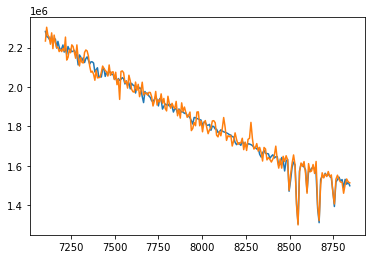

In [194]:
plt.plot(bb.wave, mp)
plt.plot(bb.wave, obsfluxs1)


In [159]:
((A*np.exp(logmp) + obsvar**0.5) - obsfluxs).dot(bb.eigv.T)

array([-4.01001139e+04, -1.15198729e+03, -7.43353423e+02,  5.56720392e+02,
        1.40535507e+02,  1.16813862e+02,  1.03316074e+02,  6.04962935e+02,
        1.29139671e+01,  2.94615443e+02])

In [165]:
bias

(array([ 2.25844671e-02, -3.41263897e-04,  4.15278914e-04,  8.88555704e-05,
         2.08642807e-05,  1.42001688e-04,  3.39392360e-04,  3.40326084e-04,
         1.71398319e-04,  1.44266257e-04]),
 array([ 5.36098624e-04, -2.02113190e-05,  8.66924211e-06,  7.17979021e-06,
         1.37333586e-06,  5.73031186e-06,  1.31911642e-05,  1.63572463e-05,
         6.37029144e-06,  7.14138548e-06]),
 array([ 2.20608354e-02, -3.21809748e-04,  4.06772262e-04,  8.19613025e-05,
         1.95410196e-05,  1.36460094e-04,  3.26632682e-04,  3.24538099e-04,
         1.65232667e-04,  1.37377478e-04]))

In [164]:
diff

array([ 3.60738801e-06,  3.13838782e-05, -4.06097531e-05,  8.67956203e-06,
       -1.18357702e-05, -2.04997812e-05, -3.35755537e-06,  1.56471240e-05,
       -8.73733580e-06, -3.31943590e-06])

In [146]:
np.log(1 + np.divide(obsvar**0.5, A * np.exp(mp)) )

NameError: name 'flux' is not defined

In [143]:
mp.shape

(220,)

In [145]:
np.log(A) + logmp + bias[2]

ValueError: operands could not be broadcast together with shapes (220,) (10,) 

In [137]:
np.sum(bb.eigv.dot(np.log(A)), axis=1)

array([-4.26325641e-14,  1.66977543e-12,  1.23034916e-12, -8.52651283e-12,
        3.51363383e-12, -1.20303767e-12, -8.59756710e-12, -6.25732799e-12,
       -3.12638804e-12,  4.23661106e-12])

In [132]:
diff

array([-3.75855565e-04,  2.02275301e-04,  3.45949835e-04,  3.27157327e-04,
       -1.37756521e-04, -3.56163529e-04, -2.89924597e-05,  2.12994862e-04,
        1.47886337e-04, -1.01975610e-04])

In [113]:
bb.eigv.shape

(10, 220)

In [111]:
np.log(obsfluxs)

array([[14.64021113, 14.6287633 , 14.62825524, ..., 14.2255387 ,
        14.23194495, 14.21974466],
       [14.64019581, 14.62904328, 14.6276827 , ..., 14.22486857,
        14.23176256, 14.21966376],
       [14.64062737, 14.62873431, 14.62783051, ..., 14.22524314,
        14.23163208, 14.21932036],
       ...,
       [14.64071683, 14.62835377, 14.62815117, ..., 14.22490328,
        14.23134066, 14.2196047 ],
       [14.64065106, 14.6284559 , 14.62790542, ..., 14.22499969,
        14.23176852, 14.21967163],
       [14.64012291, 14.6286247 , 14.62787038, ..., 14.22483079,
        14.23153689, 14.21973994]])

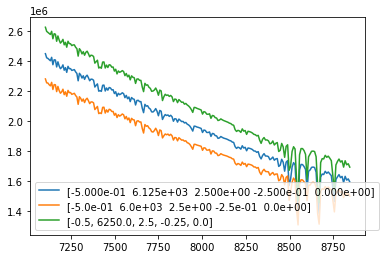

In [45]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
bb.test_rbf(bb.PhyMid, pmt2)

noise_level 63.513601312832805


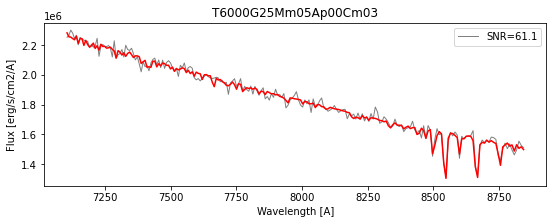

In [46]:
snr =50
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 5988.191699981689


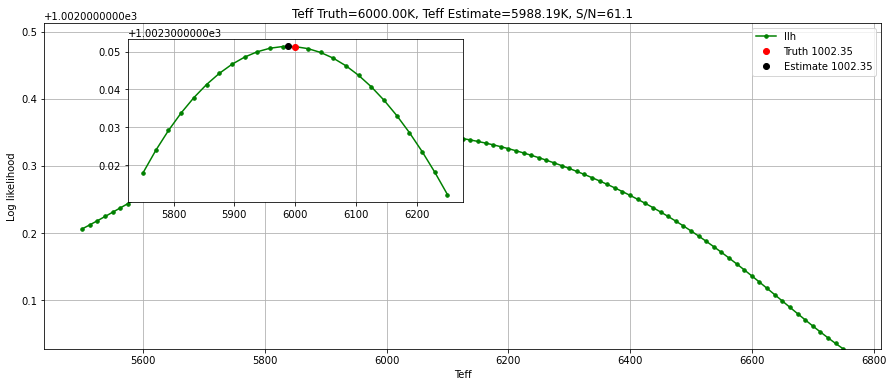

In [47]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate -0.5523437500000001


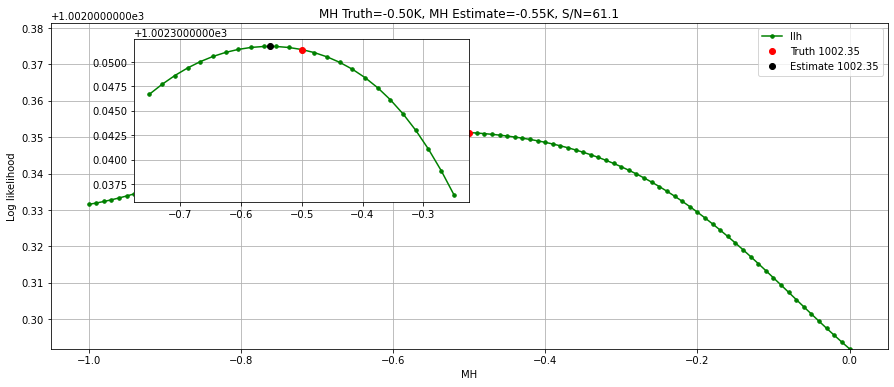

In [48]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[0], obsflux, obsvar, axis="M")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 2.55023193359375


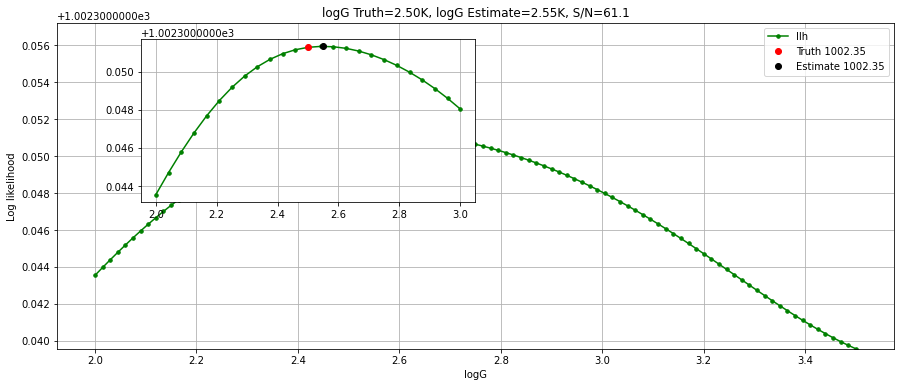

In [49]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[2], obsflux, obsvar, axis="G")

  0%|          | 0/10 [00:00<?, ?it/s]

noise_level 63.513601312832805


 10%|█         | 1/10 [00:03<00:31,  3.51s/it]

noise_level 63.513601312832805


 20%|██        | 2/10 [00:06<00:25,  3.23s/it]

noise_level 63.513601312832805


 30%|███       | 3/10 [00:10<00:23,  3.40s/it]

noise_level 63.513601312832805


 40%|████      | 4/10 [00:13<00:20,  3.49s/it]

noise_level 63.513601312832805


 50%|█████     | 5/10 [00:17<00:17,  3.45s/it]

noise_level 63.513601312832805


 60%|██████    | 6/10 [00:20<00:14,  3.54s/it]

noise_level 63.513601312832805


 70%|███████   | 7/10 [00:24<00:10,  3.59s/it]

noise_level 63.513601312832805


 80%|████████  | 8/10 [00:27<00:07,  3.51s/it]

noise_level 63.513601312832805


 90%|█████████ | 9/10 [00:31<00:03,  3.46s/it]

noise_level 63.513601312832805


100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


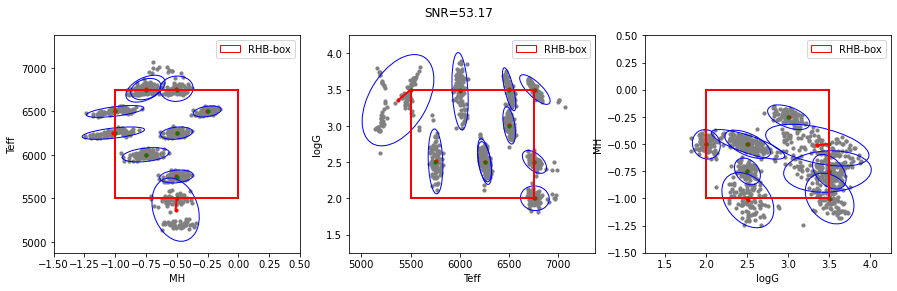

In [50]:
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:38<00:00,  9.82s/it]


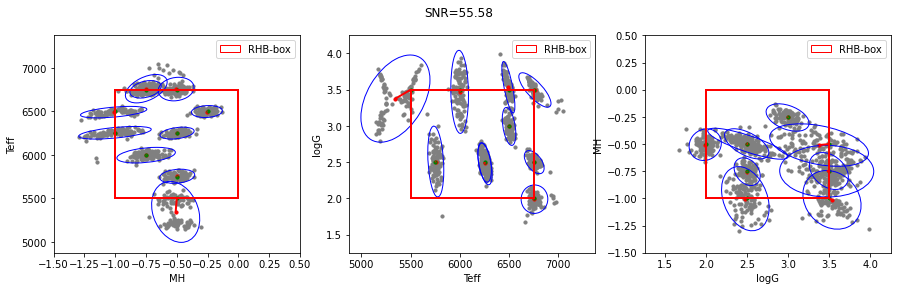

In [16]:
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


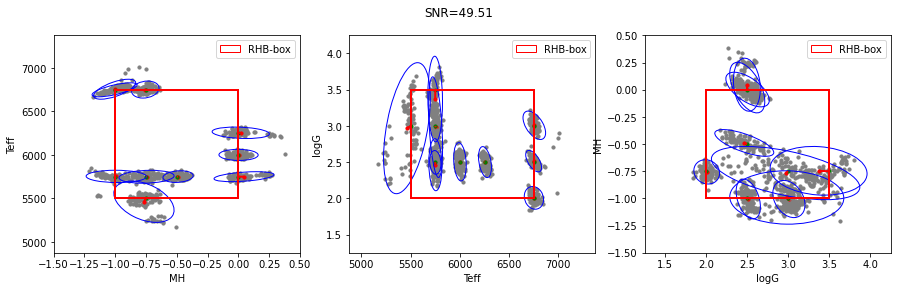

In [ ]:
snr = 50
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:40<00:00, 10.01s/it]


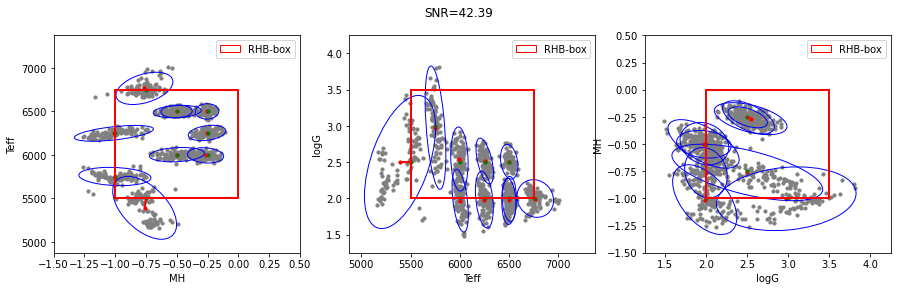

In [195]:
snr = 50
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:46<00:00, 10.67s/it]


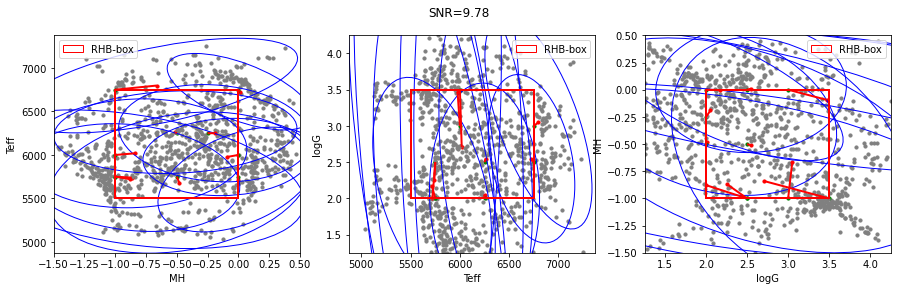

In [196]:
snr = 10
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [00:56<00:00,  5.67s/it]


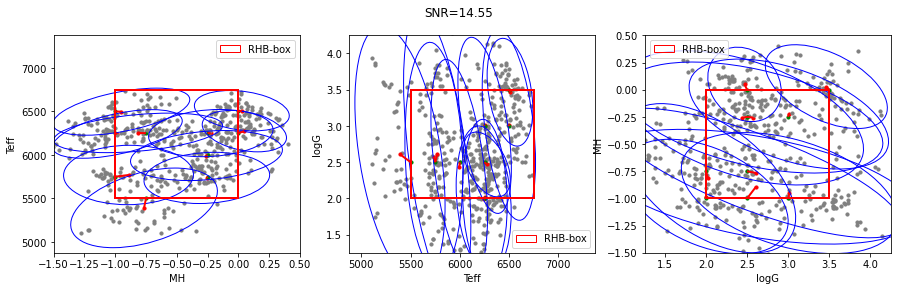

In [197]:
snr = 20
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (7776, 220)


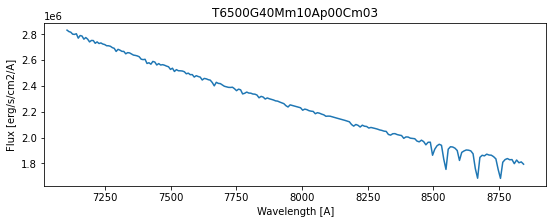

In [198]:
R="W"; 
W="RedM"; Res=5000;step=10;
bW = BoxWR()
bW.init(W,R, Res,step)

100%|██████████| 10/10 [02:27<00:00, 14.71s/it]


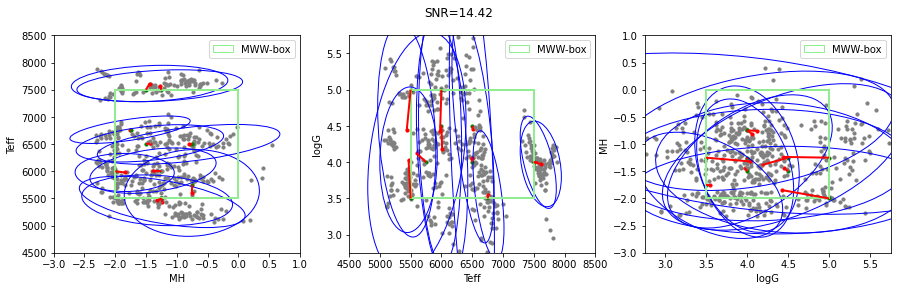

In [200]:
snr = 20
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [02:44<00:00, 16.43s/it]


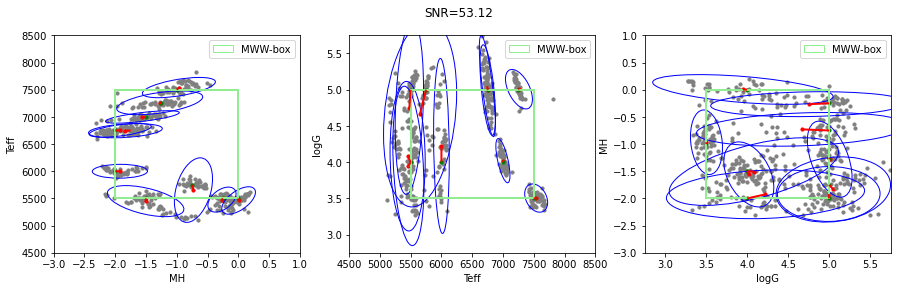

In [201]:
snr = 50
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (5760, 220)


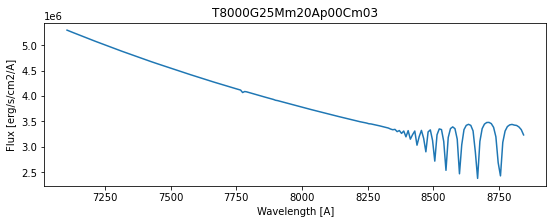

In [202]:
R="B"; 
W="RedM"; Res=5000;step=10;
bB = BoxWR()
bB.init(W,R, Res,step)

100%|██████████| 10/10 [01:56<00:00, 11.60s/it]


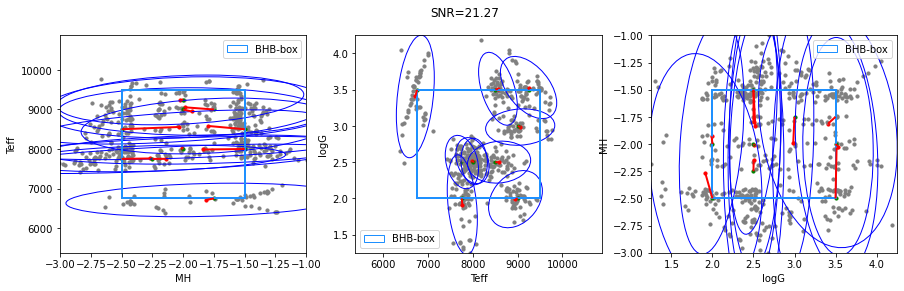

In [203]:
snr = 20
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [01:59<00:00, 11.95s/it]


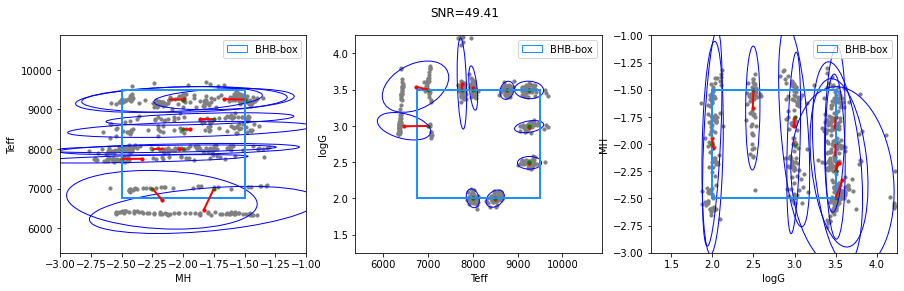

In [204]:
snr = 50
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)